## G&F (2014) Redo
#### Basic regressions on old source data for Cl/OH partitioning in amphibole

This notebook replicates and potentially extends and improves upon the analysis on chlorine partitioning in igneous amphiboles from Giesting & Filiberto (2014) in American Mineralogist. That work was done with Excel and one of the main reasons I took a data science bootcamp was to learn how to do this sort of thing with better tools. So let me get back into it by doing the *identical* thing with better tools.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes
import seaborn as sns
%matplotlib inline
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error

/home/paulus/miniconda3/envs/amphibole/lib/python3.9/site-packages/statsmodels/compat/pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [3]:
filename = "./AmphiboleProcessedRegressionData.csv"
amph_chem = pd.read_csv(filename)
amph_chem.head()

,Mg,FeM,K/Vac+Na,Di/Hi M,Fe2+,Fe3+,Mg# F'ous,ln(fH2O),Si,Ti,...,Avac,K,T,lnP,AlT/Si,Mg#M,Mg#,Ca/FeB,K+Vac/Na,ln K(Cl)
0,3.421042,0.733372,0.434545,4.913061,0.815901,0.146130,0.807432,9.544034,6.257648,0.286138,...,0.007958,0.302915,1323,9.615805,0.278436,0.823472,0.780512,7.746671,0.451111,1.589613
1,3.526782,0.747619,0.305333,5.890857,0.877378,0.063849,0.800784,9.501549,6.293746,0.383385,...,0.000000,0.233912,1298,9.210340,0.271103,0.825094,0.789341,9.330185,0.300718,-1.369825
2,3.737951,0.586423,0.289957,6.400543,0.840391,0.096032,0.816442,11.291703,6.481079,0.220091,...,0.000000,0.241485,1323,9.903488,0.234362,0.864391,0.799669,4.501958,0.289957,-0.011393
3,3.379470,0.648122,0.318876,4.141876,0.882016,0.146364,0.793026,11.184020,6.254255,0.234221,...,0.014763,0.241779,1323,9.903488,0.279129,0.839079,0.766693,4.259590,0.345065,-0.248201
4,3.260124,0.781527,0.236740,4.217302,0.975407,0.182538,0.769708,10.078985,6.135721,0.307232,...,0.030857,0.191423,1323,9.615805,0.303840,0.806632,0.737907,4.313246,0.285809,-0.299635


/home/paulus/miniconda3/envs/amphibole/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/paulus/miniconda3/envs/amphibole/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/paulus/miniconda3/envs/amphibole/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result i

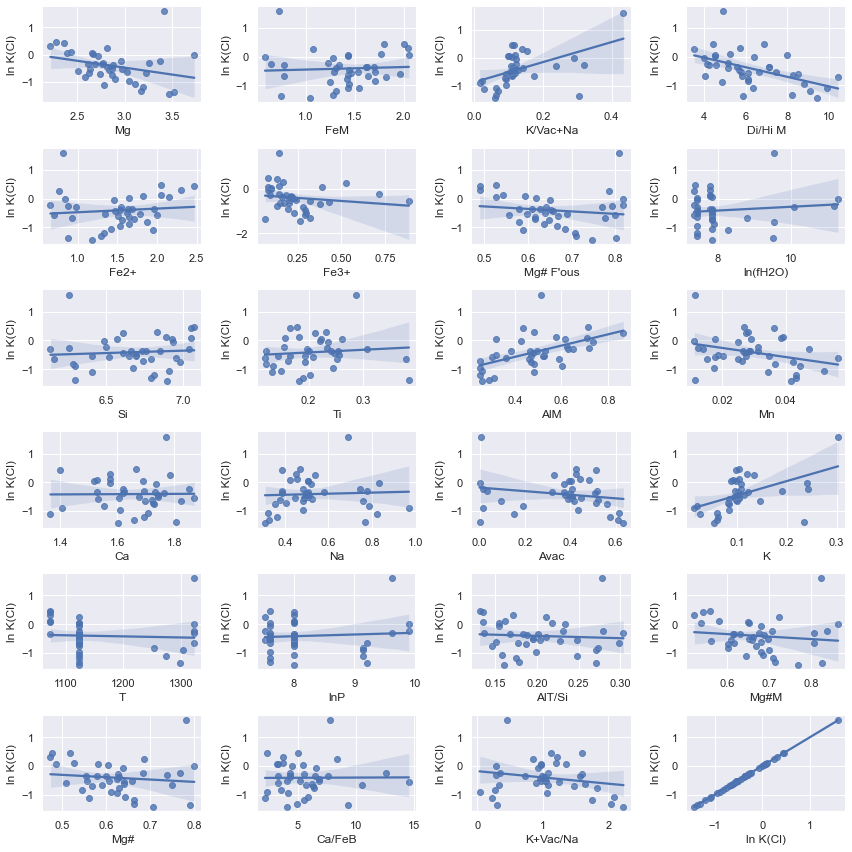

In [8]:
f,axes = plt.subplots(6, 4, figsize=(12,12))
sns.despine(left=True)
for i, col in enumerate(amph_chem.columns):
    sns.regplot(amph_chem[col],amph_chem['ln K(Cl)'],ax=axes[i//4,i%4])
plt.tight_layout()

In [9]:
XDixon3 = amph_chem[['K/Vac+Na','Mg','FeM']]
XDixon3.head()

,K/Vac+Na,Mg,FeM
0,0.434545,3.421042,0.733372
1,0.305333,3.526782,0.747619
2,0.289957,3.737951,0.586423
3,0.318876,3.379470,0.648122
4,0.236740,3.260124,0.781527


In [10]:
y = amph_chem['ln K(Cl)']
type(y)

pandas.core.series.Series

In [11]:
X1 = sm.add_constant(XDixon3)
Dix3_model = sm.OLS(y,X1)
Dix3_results = Dix3_model.fit()

In [12]:
Dix3_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln K(Cl)   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     27.41
Date:                Tue, 05 Apr 2022   Prob (F-statistic):           2.65e-09
Time:                        17:42:11   Log-Likelihood:                -10.638
No. Observations:                  39   AIC:                             29.28
Df Residuals:                      35   BIC:                             35.93
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6625      1.507      3.094      0.004       1.604       7.721
K/Vac+Na       5.6946      0.855      6.661      0.000       3.959       7.430
Mg            -1.7452      0.354     -4.935      0.000      -2.463      -1.027
FeM           -0.5681      0.359     -1.581      0.123      -1.298       0.161
==============================================================================
Omnibus:                       15.172   Durbin-Watson:                   2.535
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               29.936
Skew:                          -0.860   Prob(JB):                     3.16e-07
Kurtosis:                       6.933   Cond. No.                         101.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
Dix3_model_noc = sm.OLS(y,XDixon3)
Dix3_results_noc = Dix3_model_noc.fit()
Dix3_results_noc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               ln K(Cl)   R-squared (uncentered):                   0.746
Model:                            OLS   Adj. R-squared (uncentered):              0.725
Method:                 Least Squares   F-statistic:                              35.31
Date:                Tue, 05 Apr 2022   Prob (F-statistic):                    8.04e-11
Time:                        17:43:21   Log-Likelihood:                         -15.354
No. Observations:                  39   AIC:                                      36.71
Df Residuals:                      36   BIC:                                      41.70
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
K/Vac+Na       6.5881      0.895      7.358      0.000       4.772       8.404
Mg            -0.6788      0.088     -7.674      0.000      -0.858      -0.499
FeM            0.4874      0.126      3.876      0.000       0.232       0.742
==============================================================================
Omnibus:                       15.461   Durbin-Watson:                   2.238
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.711
Skew:                          -1.014   Prob(JB):                     4.31e-06
Kurtosis:                       6.330   Cond. No.                         48.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### This model has identical parameters to the model in the abstract of Giesting & Filiberto (2014). Thank God, that was easy.